In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データを作成
data = {
    'A': ['Group1']*5 + ['Group2']*5 + ['Group3']*5,
    'B': np.random.randint(10, 50, size=15),
    'C': ['Label'+str(i) for i in range(1,6)]*3
}

# データフレームを作成
df = pd.DataFrame(data)

print(df)

         A   B       C
0   Group1  20  Label1
1   Group1  13  Label2
2   Group1  33  Label3
3   Group1  45  Label4
4   Group1  23  Label5
5   Group2  35  Label1
6   Group2  11  Label2
7   Group2  48  Label3
8   Group2  37  Label4
9   Group2  27  Label5
10  Group3  11  Label1
11  Group3  44  Label2
12  Group3  32  Label3
13  Group3  15  Label4
14  Group3  29  Label5


In [21]:
# 100%棒グラフ

def draw_stacked_bar(ax, df, group_col, value_col, label_col, group_label):
    """
    Stacked bar plot を描画する関数

    Parameters
    ----------
    ax: matplotlib.axes.Axes
        描画対象の Axes
    df: pandas.DataFrame
        データフレーム
    group_col: str
        グループ名が含まれている列名
    value_col: str
        値が含まれている列名
    label_col: str
        ラベルが含まれている列名
    group_label: str
        描画対象のグループのラベル名
    """
    # グループごとの値の合計を計算
    total_sum = df.groupby(group_col)[value_col].sum()

    # 特定のグループのデータを取得
    group = df[df[group_col] == group_label]
    # 値の降順に並べ替え
    group = group.sort_values(value_col, ascending=False)
    # 値をパーセントに変換
    group[value_col] = group[value_col] / total_sum[group_label] * 100
    
    # 棒グラフの底部を描画するための初期位置
    bottom = 0

    for value, label in zip(group[value_col], group[label_col]):
        # 棒グラフを描画。指定のカラムの値をラベルとして使用。
        ax.bar(group_label, value, bottom=bottom, label=label)

        # 次の棒グラフの底部を更新
        bottom += value

    # タイトルを設定
    ax.set_title(f'{group_col}: {group_label}')
    ax.set_ylabel('Percent')

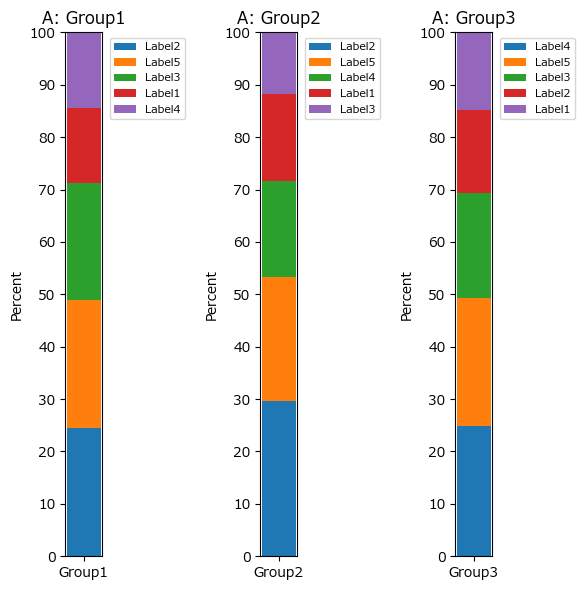

In [22]:
#subplots
# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

group_labels = df['A'].unique()

n = len(group_labels)
cols = 3
rows = n // cols
rows += n % cols

fig, axs = plt.subplots(rows, cols, figsize=(cols*2, rows*6))

for ax, label in zip(axs.ravel(), group_labels):
    draw_stacked_bar(ax, df, 'A', 'B', 'C', label)
    # y軸の範囲を0から100に設定
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_ylabel('Percent')
    # 凡例の設定
    ax.legend(bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=8,
              )

# 余分なsubplotを削除
for i in range(len(group_labels), rows*cols):
    fig.delaxes(axs.flatten()[i])

fig.tight_layout()  # レイアウトを自動調整

plt.show()

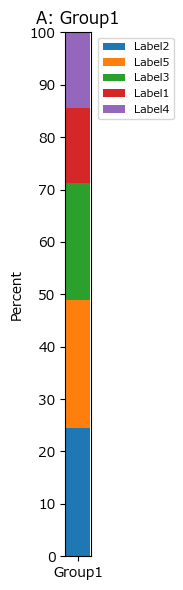

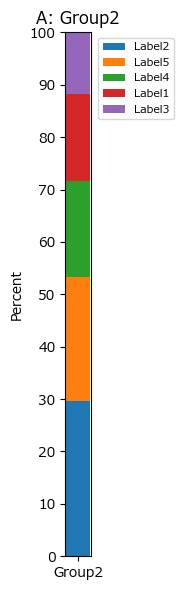

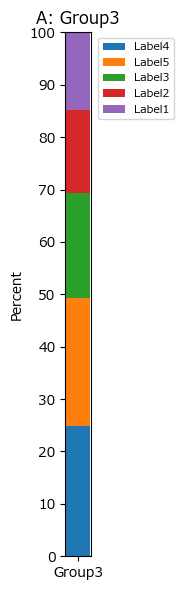

In [25]:
# 連続出力
# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

group_labels = df['A'].unique()

for label in group_labels:
    fig, ax = plt.subplots(figsize=(2, 6))
    draw_stacked_bar(ax, df, 'A', 'B', 'C', label)
    # y軸の範囲を0から100に設定
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_ylabel('Percent')
    # 凡例の設定
    ax.legend(bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=8,
              )
    fig.tight_layout()  # レイアウトを自動調整

    plt.show()

In [ ]:
# パーセンテージ棒グラフ
def draw_bar(ax, df, group_col, value_col, label_col, group_label):
    """
    ax: Axes object to draw the graph on.
    df: DataFrame containing the data.
    group_col: Column name in df which contains group names.
    value_col: Column name in df which contains value data.
    label_col: Column name in df which contains label names.
    group_label: The specific label of the group to be drawn.
    """
        # グループごとの値の合計を計算
    total_sum = df.groupby(group_col)[value_col].sum()

    # 特定のグループのデータを取得
    group = df[df[group_col] == group_label]
    # 値の降順に並べ替え
    group = group.sort_values(value_col, ascending=False)
    # 値をパーセントに変換
    group[value_col] = group[value_col] / total_sum[group_label] * 100
    
    # 棒グラフを描画。指定のカラムの値をラベルとして使用。
    ax.bar(group[label_col], group[value_col], label=group_label)

    # タイトルを設定
    ax.set_title(f'{group_col}: {group_label}')
    ax.set_ylabel('%')

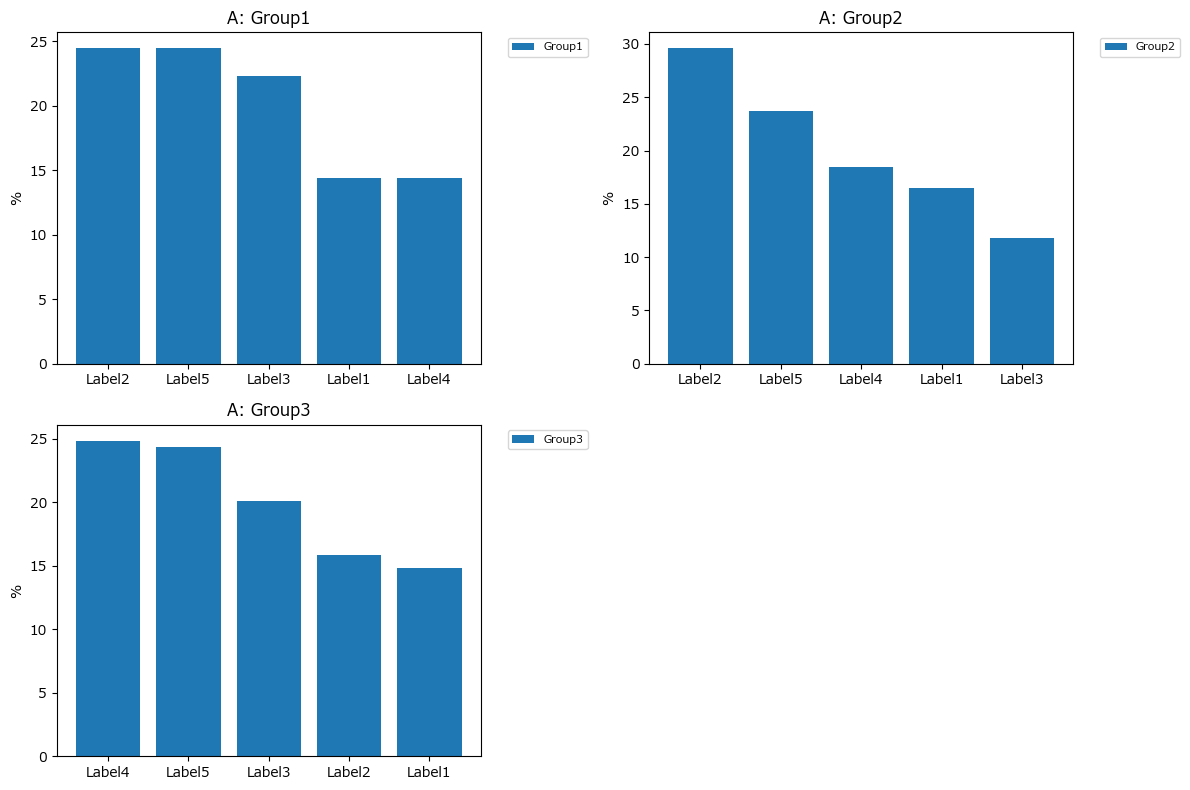

In [16]:
# 一括出力
# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

group_labels = df['A'].unique()

n = len(group_labels)
cols = 2
rows = n // cols
rows += n % cols

fig, axs = plt.subplots(rows, cols, figsize=(cols*6, rows*4))

for ax, label in zip(axs.ravel(), group_labels):
    draw_bar(ax, df, 'A', 'B', 'C', label)
    # 凡例の設定
    ax.legend(bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=8,
              )

# 余分なsubplotを削除
for i in range(len(group_labels), rows*cols):
    fig.delaxes(axs.flatten()[i])

fig.tight_layout()  # レイアウトを自動調整

plt.show()

In [ ]:
# 連続出力
# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

group_labels = df['A'].unique()

for label in group_labels:
    fig, ax = plt.subplots(figsize=(6, 4))
    draw_bar(ax, df, 'A', 'B', 'C', label)
    # 凡例の設定
    ax.legend(bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=8,
              )
    fig.tight_layout()  # レイアウトを自動調整

    plt.show()

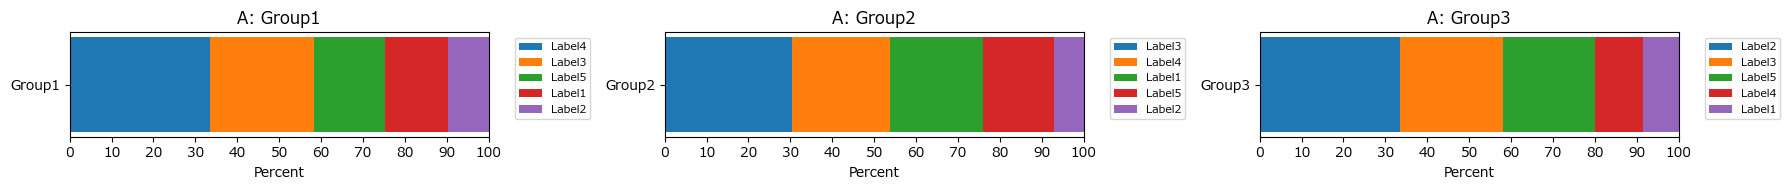

In [6]:
def draw_stacked_bar(ax, df, group_col, value_col, label_col, group_label):
    """
    Stacked bar plot を描画する関数

    Parameters
    ----------
    ax: matplotlib.axes.Axes
        描画対象の Axes
    df: pandas.DataFrame
        データフレーム
    group_col: str
        グループ名が含まれている列名
    value_col: str
        値が含まれている列名
    label_col: str
        ラベルが含まれている列名
    group_label: str
        描画対象のグループのラベル名
    """
    # グループごとの値の合計を計算
    total_sum = df.groupby(group_col)[value_col].sum()

    # 特定のグループのデータを取得
    group = df[df[group_col] == group_label]
    # 値の降順に並べ替え
    group = group.sort_values(value_col, ascending=False)
    # 値をパーセントに変換
    group[value_col] = group[value_col] / total_sum[group_label] * 100
    
    # 棒グラフの底部を描画するための初期位置
    bottom = 0

    for value, label in zip(group[value_col], group[label_col]):
        # 棒グラフを描画。指定のカラムの値をラベルとして使用。
        ax.barh(group_label, value, left=bottom, label=label)

        # 次の棒グラフの底部を更新
        bottom += value

    # タイトルを設定
    ax.set_title(f'{group_col}: {group_label}')
    ax.set_xlabel('Percent')

#subplots
# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'

group_labels = df['A'].unique()

n = len(group_labels)
cols = 3
rows = n // cols
rows += n % cols

fig, axs = plt.subplots(rows, cols, figsize=(cols*6, rows*2))

for ax, label in zip(axs.ravel(), group_labels):
    draw_stacked_bar(ax, df, 'A', 'B', 'C', label)
    # x軸の範囲を0から100に設定
    ax.set_xlim(0, 100)
    ax.set_xticks(np.arange(0, 101, 10))
    ax.set_xlabel('Percent')
    # 凡例の設定
    ax.legend(bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=8,
              )

# 余分なsubplotを削除
for i in range(len(group_labels), rows*cols):
    fig.delaxes(axs.flatten()[i])

fig.tight_layout()  # レイアウトを自動調整

plt.show()

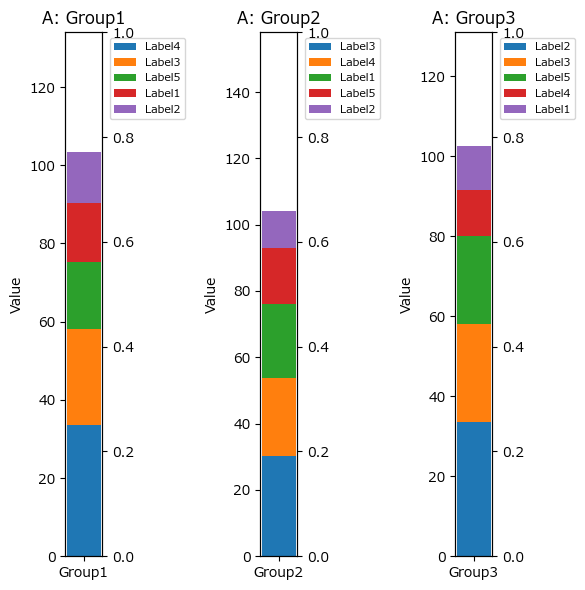

In [5]:
def draw_stacked_bar(ax, df, group_col, value_col, label_col, group_label, axis_option='both'):
    """
    Stacked bar plot を描画する関数

    Parameters
    ----------
    ax: matplotlib.axes.Axes
        描画対象の Axes
    df: pandas.DataFrame
        データフレーム
    group_col: str
        グループ名が含まれている列名
    value_col: str
        値が含まれている列名
    label_col: str
        ラベルが含まれている列名
    group_label: str
        描画対象のグループのラベル名
    axis_option: str, optional
        描画する軸のオプション. 'values', 'percent', または 'both' (defaultは 'both')
    """
    # グループごとの値の合計を計算
    total_sum = df.groupby(group_col)[value_col].sum()

    # 特定のグループのデータを取得し、降順に並べ替え、パーセントに変換
    group = df[df[group_col] == group_label].sort_values(value_col, ascending=False)
    percentages = group[value_col] / total_sum[group_label] * 100

    # 2つ目のy軸を作成
    ax2 = ax.twinx()

    # 棒グラフの底部を描画するための初期位置
    bottom = 0

    for value, percent, label in zip(group[value_col], percentages, group[label_col]):
        if axis_option in ['values', 'both']:
            ax.bar(group_label, value, bottom=bottom, label=label)
        if axis_option in ['percent', 'both']:
            ax2.bar(group_label, percent, bottom=bottom, label=label)
        bottom += percent

    # タイトル、y軸の範囲、y軸のラベル、凡例を設定
    ax.set_title(f'{group_col}: {group_label}')
    if axis_option in ['values', 'both']:
        ax.set_ylim(0, total_sum[group_label])
        ax.set_ylabel('Value')
    if axis_option in ['percent', 'both']:
        ax2.set_ylim(0, 100)
        ax2.set_yticks(np.arange(0, 101, 10))
        ax2.set_ylabel('Percent')

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)


def plot_grouped_stacked_bars(df, group_col, value_col, label_col):
    group_labels = df[group_col].unique()
    n = len(group_labels)
    cols = 3
    rows = n // cols + n % cols

    fig, axs = plt.subplots(rows, cols, figsize=(cols*2, rows*6))
    
    for ax, label in zip(axs.ravel(), group_labels):
        draw_stacked_bar(ax, df, group_col, value_col, label_col, label, axis_option='values')

    for i in range(n, rows*cols):
        fig.delaxes(axs.flatten()[i])

    fig.tight_layout()
    plt.show()


# フォントを設定
plt.rcParams['font.family'] = 'Meiryo'
plot_grouped_stacked_bars(df, 'A', 'B', 'C')
